<a href="https://colab.research.google.com/github/akansha-04/Embedded/blob/main/face_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip /content/drive/MyDrive/embedded/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [ ]:
!pip install utils

  Preparing metadata (setup.py) ... done
  Created wheel for utils: filename=utils-1.0.2-py2.py3-none-any.whl size=13906 sha256=7c847cfad7f9413653de60f519984a730c2c36cfb99f186e5cb6311e016c708d
  Stored in directory: /root/.cache/pip/wheels/b8/39/f5/9d0ca31dba85773ececf0a7f5469f18810e1c8a8ed9da28ca7
Successfully built utils


In [ ]:
!pip install livelossplot

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.15.0


In [ ]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/" + expression))) + " " + expression + " images")

4830 sad images
436 disgust images
7215 happy images
3171 surprise images
4097 fear images
4965 neutral images
3995 angry images


In [ ]:
img_size = 48
batch_size = 64

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=False)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [ ]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(48, 48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

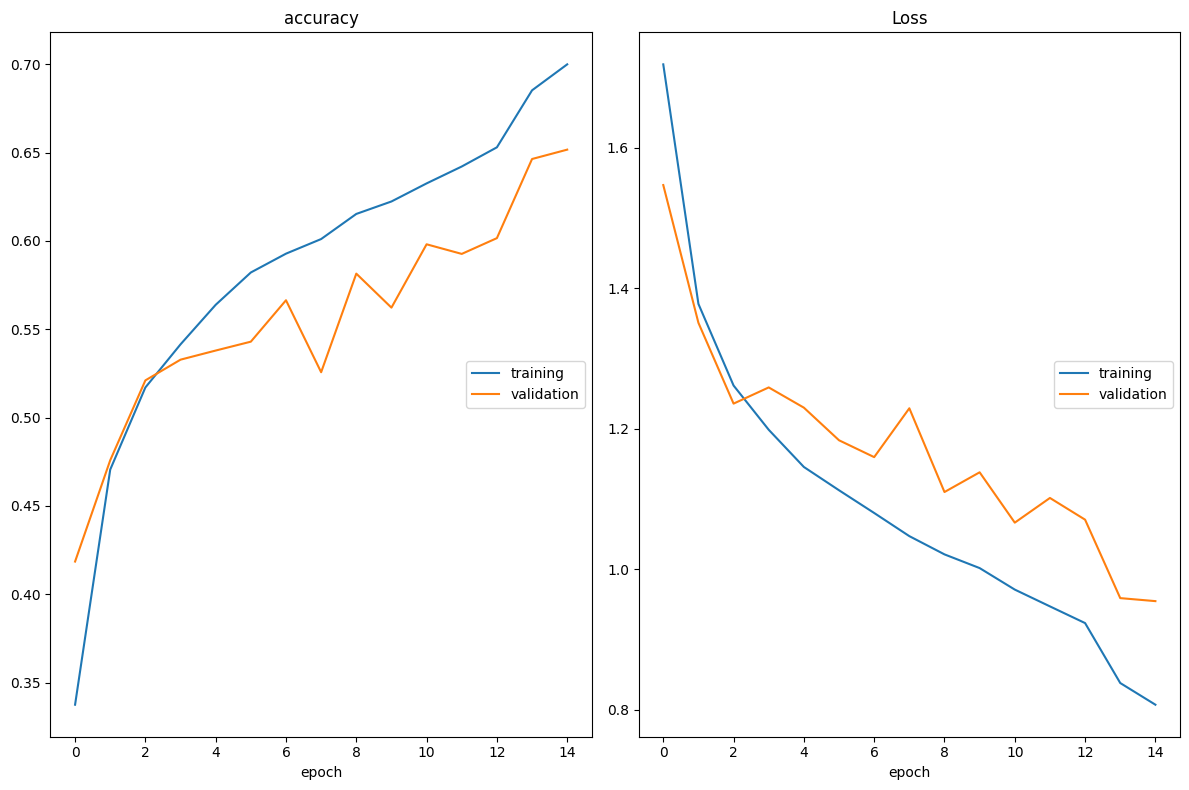

accuracy
	training         	 (min:    0.338, max:    0.700, cur:    0.700)
	validation       	 (min:    0.419, max:    0.652, cur:    0.652)
Loss
	training         	 (min:    0.807, max:    1.718, cur:    0.807)
	validation       	 (min:    0.955, max:    1.547, cur:    0.955)

Epoch 15: saving model to model_weights.h5
448/448 [==============================] - 20s 44ms/step - loss: 0.8074 - accuracy: 0.6999 - val_loss: 0.9547 - val_accuracy: 0.6516 - lr: 1.0000e-04
CPU times: user 6min 9s, sys: 27.2 s, total: 6min 36s
Wall time: 6min 20s


In [ ]:
%%time

epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("model_weights.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]

history = model.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks=callbacks
)

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 67.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
      Successfully uninstalled packaging-24.0


In [ ]:
!pip install serial

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 2.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import serial
import cv2
from PIL import Image,ImageEnhance
import numpy as np
import os
import time
from bokeh.models.widgets import Div

In [ ]:
cd '/content/drive/MyDrive/embedded/'

/content/drive/MyDrive/embedded


In [ ]:
from my_model.model import FacialExpressionModel

In [ ]:
st.set_option('deprecation.showfileUploaderEncoding', False)
face_cascade = cv2.CascadeClassifier('frecog/haarcascade_frontalface_default.xml')
model = FacialExpressionModel("my_model/model.json", "my_model/model_weights.h5")
font = cv2.FONT_HERSHEY_SIMPLEX

2024-03-15 05:30:48.751 
════════════════════════════════════════════════
deprecation.showfileUploaderEncoding IS NO LONGER SUPPORTED.

deprecation.showfileUploaderEncoding has been deprecated and will be removed in a future version.

Please update <user defined>.
════════════════════════════════════════════════



In [ ]:
def detect_faces(our_image):
	new_img = np.array(our_image.convert('RGB'))
	img = cv2.cvtColor(new_img,1)
	gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	# Detect faces
	faces = face_cascade.detectMultiScale(gray, 1.1, 4)
	# Draw rectangle around the faces
	for (x, y, w, h) in faces:

			fc = gray[y:y+h, x:x+w]
			roi = cv2.resize(fc, (48, 48))
			pred = model.predict_emotion(roi[np.newaxis, :, :, np.newaxis])
			cv2.putText(img, pred, (x, y), font, 1, (255, 255, 0), 2)
			cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
			return img,faces,pred

In [ ]:
def main():

	"""Face Expression Detection App"""
	#setting the app title & sidebar

	activities = ["Home" ,"Model Performance","Manual"]
	choice = st.sidebar.selectbox("Select Activity",activities)
	#if choosing to consult the cnn model performance
	if choice == 'Home':
		col1, col2 = st.columns([5,1],gap="medium")
		with col1:
			st.title("Welcome to Bouquet!")
			st.caption("Our Smart Scent Diffuser takes your emotions into consideration. Relax your mind with a unique blend of aromatherapy and artificial intelligence!")
		with col2:
			st.image("/content/drive/MyDrive/embedded/logo.png", width=160, use_column_width=None)

		st.subheader("Let's dive into the depths of your emotions with our cutting-edge technology!")
		st.caption("To ensure the most accurate detection, please capture the image in a well-lit environment.")
		image_file = st.camera_input("Enable your video to capture the image:")

	#if image if uploaded,display the progress bar +the image
		if image_file is not None:
				our_image = Image.open(image_file)
				st.text("Original Image")
				progress = st.progress(0)
				for i in range(100):
					time.sleep(0.01)
					progress.progress(i+1)
				st.image(our_image)
		if image_file is None:
			st.error("No image uploaded yet")

		# Face Detection
		task = ["Faces"]
		feature_choice = st.sidebar.selectbox("Find Features",task)
		if st.button("Process"):
			if feature_choice == 'Faces':

				#process bar
				progress = st.progress(0)
				for i in range(100):
					time.sleep(0.05)
					progress.progress(i+1)
				#end of process bar
				ser = serial.Serial('COM5', 9600)
				time.sleep(2)
				result_img,result_faces,prediction = detect_faces(our_image)
				if st.image(result_img) :
					st.success("Found {} faces".format(len(result_faces)))

					if prediction == 'Happy' or prediction == 'Neutral' or prediction == 'Surprise' :
						ser.write(b'0\n')
						st.subheader("Feeling relaxed and happy? Let our scent diffuser set the mood for you! Sit back and enjoy the fragrance!")


					elif prediction == 'Angry' or prediction == 'Sad' or prediction == 'Disgust' or prediction == 'Fear':
						ser.write(b'1\n')
						st.subheader("Feeling a bit stressed? Don't worry! Sit back, relax and let our diffuser take care of you!")



					else :
						st.error("Uh Oh! We weren't able to detect an emotion properly. Please try again.")

					ser.close()



	if choice == 'Manual':
				col1, col2 = st.columns([5,1],gap="medium")
				with col1:
					st.title("Welcome to Bouquet!")
					st.caption("Our Smart Scent Diffuser takes your emotions into consideration. Relax your mind with a unique blend of aromatherapy and artificial intelligence!")
				with col2:
					st.image("logo.png", width=160, use_column_width=None)

				ser = serial.Serial('COM5', 9600)
				time.sleep(2)
				button = st.button("Are you feeling Happy today?")
				if button:
							st.subheader("Feeling relaxed and happy? Let our scent diffuser set the mood for you! Sit back and enjoy the fragrance!")
							ser.write(b'0\n')
				button1 = st.button("Something got you Stressed?")
				if button1:
							st.subheader("Feeling a bit stressed? Don't worry! Sit back, relax and let our diffuser take care of you!")
							ser.write(b'1\n')
				ser.close()

	if choice == 'Model Performance':
		st.header("Learn more about the advanced model that powers our Smart Scent Diffuser!")
		st.text("We have used a convulutional neural network:")
		st.image('images/model.png', width=700)
		st.subheader("To train the model we used the FER2013 dataset")
		st.text(" https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data")
		st.image('/content/drive/MyDrive/embedded/images/dataframe.png', width=700)
		st.subheader("Lets look at the performance!")
		st.markdown("Accuracy :chart_with_upwards_trend: :")
		st.image("/content/drive/MyDrive/embedded/images/accuracy.png")
		st.markdown("Loss :chart_with_downwards_trend: : ")
		st.image("/content/drive/MyDrive/embedded/images/loss.png")
	#if choosing to detect your face exp , give access to upload the image


In [ ]:
main()